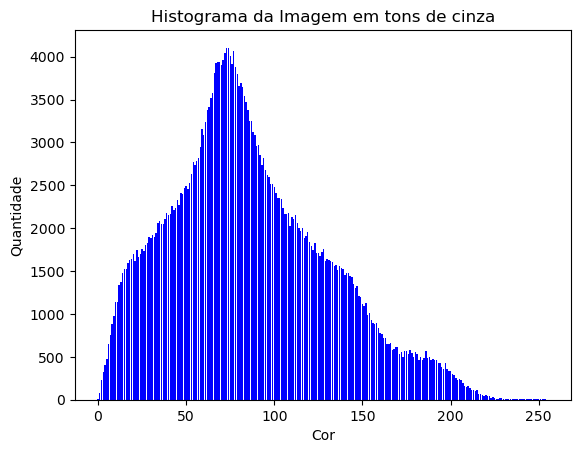

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#Carregando a imagem
path = 'Little Red Riding Hood.jpg'
img = cv2.imread(path)

img_height = img.shape[0]
img_width = img.shape[1]

#Transformando em escala de cinza
gray = np.zeros(img.shape[:2], dtype = 'uint8')

for i in range(img_height):
    for j in range(img_width):
        gray[i][j] = sum(img[i][j])//3
        
cv2.imshow('Gray', gray)
cv2.waitKey()

#Fazendo o histograma da imagem
hist = [0] * 256

for i in range(img_height):
    for j in range(img_width):
        px = gray[i][j]
        hist[px] += 1 

pixel = 256*[0]
for i in range(256):
    pixel[i] = i

plt.xlabel('Cor')
plt.ylabel('Quantidade')
plt.title('Histograma da Imagem em tons de cinza')

plt.bar(pixel, hist, color = 'blue')
plt.show()

0.9999999999999991


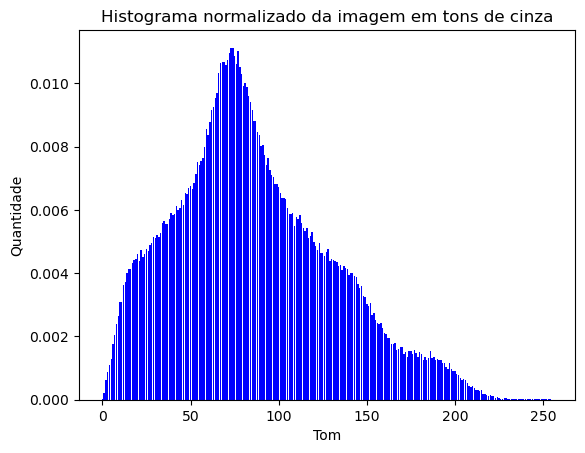

In [17]:
#Normalizando o histograma
normalized_hist = [0] * 256

n = img_height*img_width

for k in range(256):
        ndp = hist[k]
        normalized_hist[k] = ndp/n

pixel = 256*[0]
for i in range(256):
    pixel[i] = i

plt.xlabel('Tom')
plt.ylabel('Quantidade')
plt.title('Histograma normalizado da imagem em tons de cinza')

plt.bar(pixel, normalized_hist, color = 'blue')
plt.show()

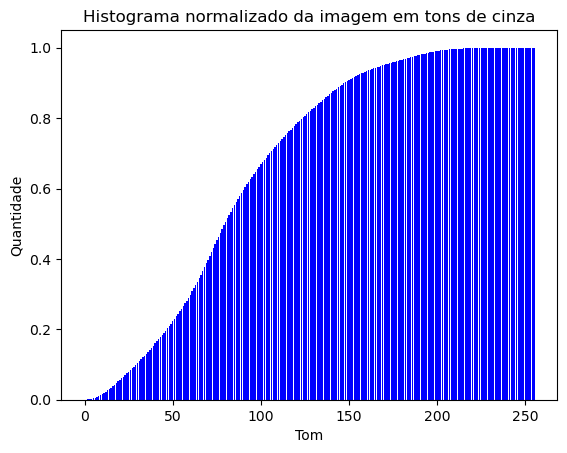

In [28]:
#Normalizando o histograma
ac_normalized_hist = [0] * 256

n = img_height*img_width

for k in range(256):
        ndp = hist[k]
        if k == 0:
            ac_normalized_hist[k] = ndp/n
        ac_normalized_hist[k] = ac_normalized_hist[k-1] + (ndp/n)

pixel = 256*[0]
for i in range(256):
    pixel[i] = i

plt.xlabel('Tom')
plt.ylabel('Quantidade')
plt.title('Histograma normalizado da imagem em tons de cinza')

plt.bar(pixel, ac_normalized_hist, color = 'blue')
plt.show()

In [36]:
mapa = np.zeros(256)
for i in range(256):
    mapa[i] = round(ac_normalized_hist[i] * 255)

eq_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

for i in range(img_height):
    for j in range(img_width):
        eq_img[i][j] = mapa[gray[i][j]]

cv2.imshow('bal', eq_img)
cv2.waitKey()

-1

In [39]:
mapa

array([  0.,   0.,   0.,   0.,   1.,   1.,   2.,   2.,   3.,   3.,   4.,
         5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  16.,
        17.,  18.,  19.,  20.,  21.,  23.,  24.,  25.,  27.,  28.,  29.,
        31.,  32.,  33.,  35.,  36.,  38.,  39.,  41.,  42.,  44.,  45.,
        47.,  49.,  50.,  52.,  53.,  55.,  57.,  59.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  81.,  83.,  86.,  88.,
        91.,  93.,  96.,  99., 102., 104., 107., 110., 113., 115., 118.,
       121., 124., 126., 129., 131., 134., 136., 139., 141., 143., 146.,
       148., 150., 152., 154., 156., 158., 160., 162., 163., 165., 167.,
       169., 170., 172., 174., 175., 177., 179., 180., 182., 183., 184.,
       186., 187., 189., 190., 192., 193., 194., 196., 197., 198., 200.,
       201., 202., 203., 205., 206., 207., 208., 209., 210., 212., 213.,
       214., 215., 216., 217., 218., 219., 220., 221., 222., 223., 224.,
       225., 226., 227., 228., 229., 230., 231., 23